In [1]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file_name = '/mnt/5T3/Greg/4Greg/margot_f2.h5'
hf = h5py.File(file_name)

In [3]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))

Keys: [&#39;input&#39;, &#39;target&#39;]
Attrs: {}


In [4]:
image_input = hf['input'][()]
image_target = hf['target'][()]

# Check shape
print(image_input.shape)
print(image_target.shape)



(240, 4, 266, 320)
(240, 4, 266, 320)


In [14]:
def show_echos_for_slice(data, slice_num, echos,cmap=None):
    fig = plt.figure(figsize=(20,20))
    for i, echo in enumerate(echos):
        plt.subplot(1, len(echos), i+1)
        plt.imshow(data[slice_num,echo,:, :], cmap='gray')

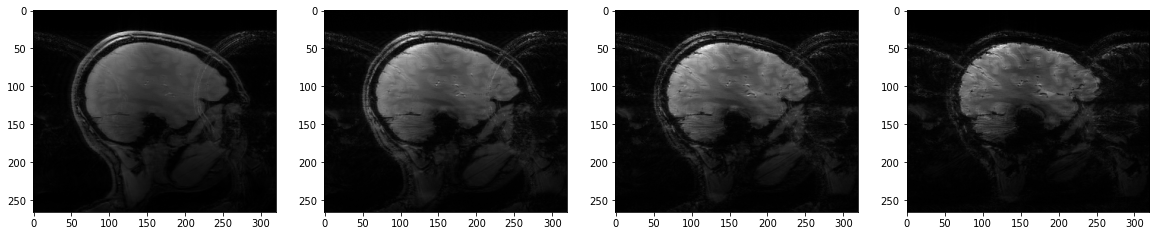

In [15]:
show_echos_for_slice(image_input, 60, [0,1,2,3])

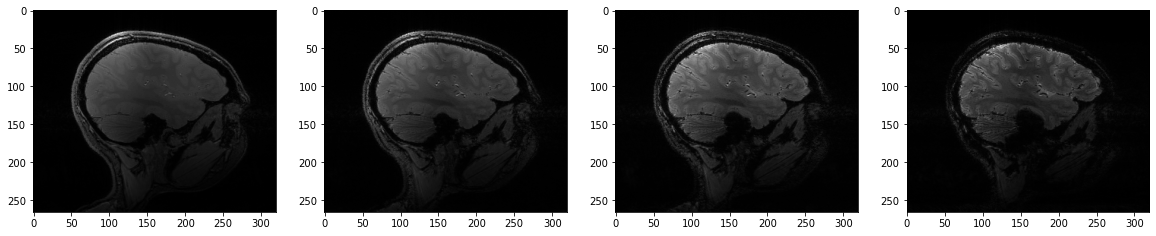

In [16]:
show_echos_for_slice(image_target, 60, [0,1,2,3])

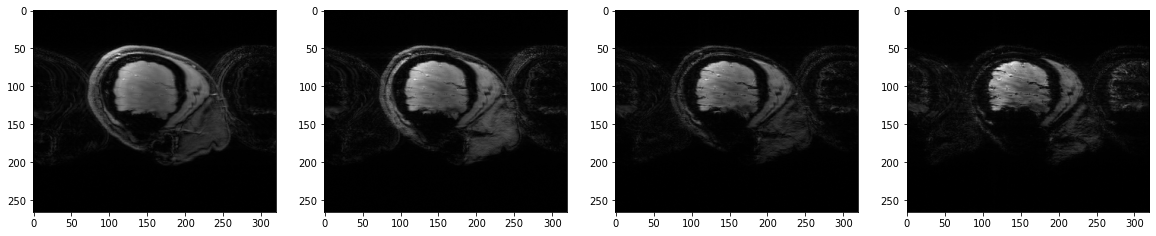

In [17]:
show_echos_for_slice(image_input, 35, [0,1,2,3])

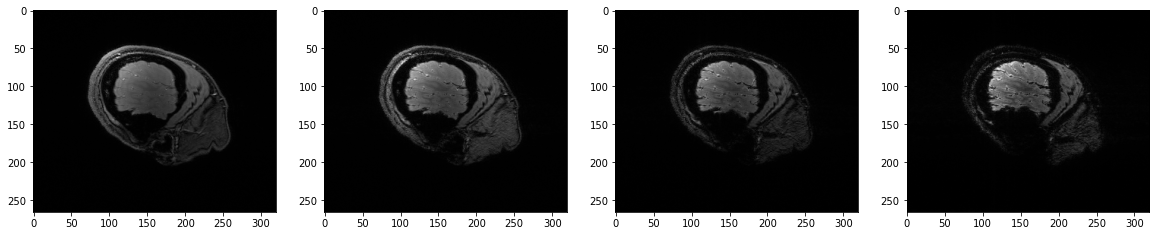

In [18]:
show_echos_for_slice(image_target, 35, [0,1,2,3])